In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Let load the California House Predition Dataset

In [2]:
dataset = pd.read_csv('housing.csv')

In [3]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
#Checking dataset describition
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#check shape 
dataset.shape

(20640, 10)

In [6]:
#checking Null values
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#Drop null values
dataset.dropna(inplace=True)

In [9]:
dataset.shape

(20433, 10)

In [10]:
#Cross check null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
dataset.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data Exploration

In [12]:
#Making independent data variable
x = dataset.drop(['median_house_value'], axis=1)

#Making dependent data variable
y = dataset['median_house_value']

In [13]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [14]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [15]:
# Spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
# Join training data to make co-relations
train_data = x_train.join(y_train)
train_data = train_data.drop(['ocean_proximity'], axis=1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

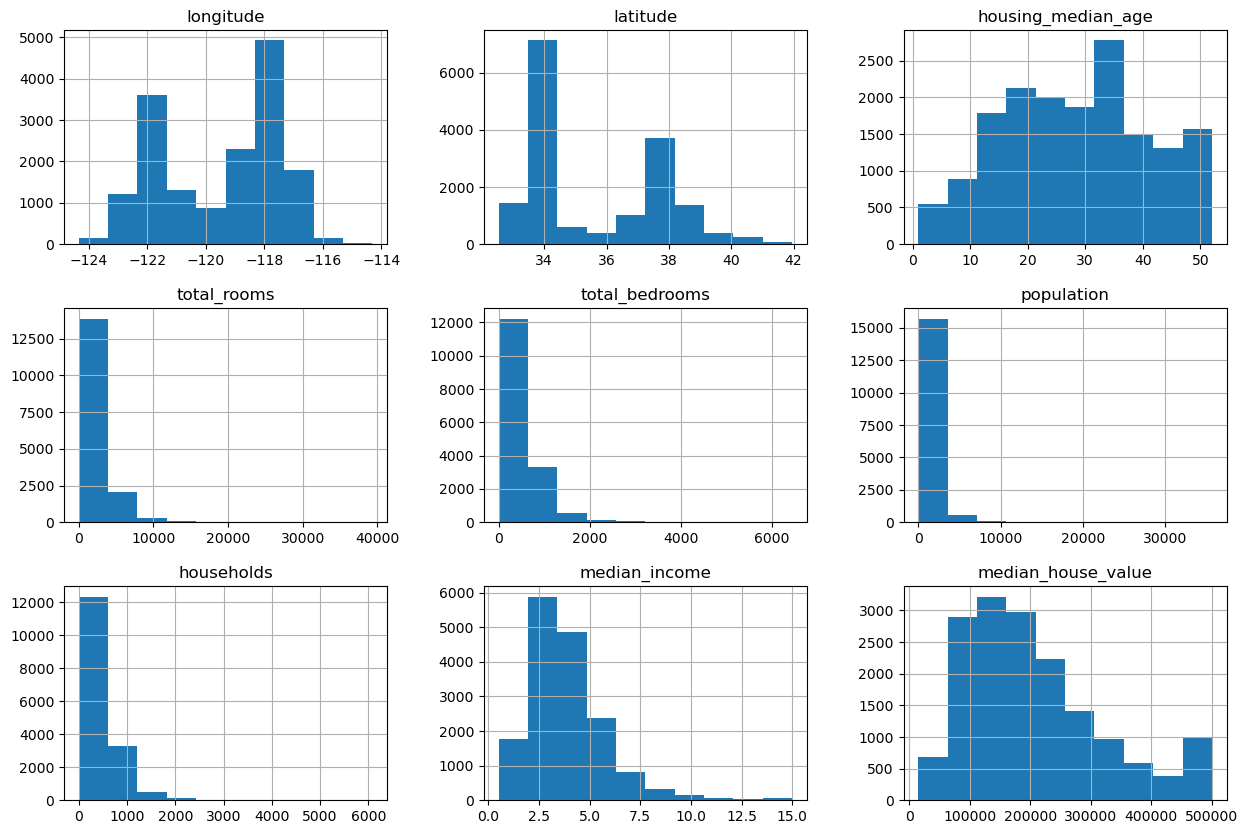

In [17]:
# Making histogram to see co-relations
train_data.hist(figsize=(15,10))

In [18]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924855,-0.108972,0.044112,0.068264,0.098651,0.055665,-0.011551,-0.046276
latitude,-0.924855,1.000000,0.012083,-0.037114,-0.067702,-0.108487,-0.072715,-0.083271,-0.144174
housing_median_age,-0.108972,0.012083,1.000000,-0.358566,-0.319112,-0.292397,-0.300634,-0.118274,0.107539
total_rooms,0.044112,-0.037114,-0.358566,1.000000,0.929523,0.854883,0.919955,0.199294,0.134835
total_bedrooms,0.068264,-0.067702,-0.319112,0.929523,1.000000,0.874058,0.980793,-0.005700,0.051644
population,0.098651,-0.108487,-0.292397,0.854883,0.874058,1.000000,0.902333,0.007928,-0.023004
households,0.055665,-0.072715,-0.300634,0.919955,0.980793,0.902333,1.000000,0.015718,0.067404
median_income,-0.011551,-0.083271,-0.118274,0.199294,-0.005700,0.007928,0.015718,1.000000,0.687664
median_house_value,-0.046276,-0.144174,0.107539,0.134835,0.051644,-0.023004,0.067404,0.687664,1.000000


<Axes: >

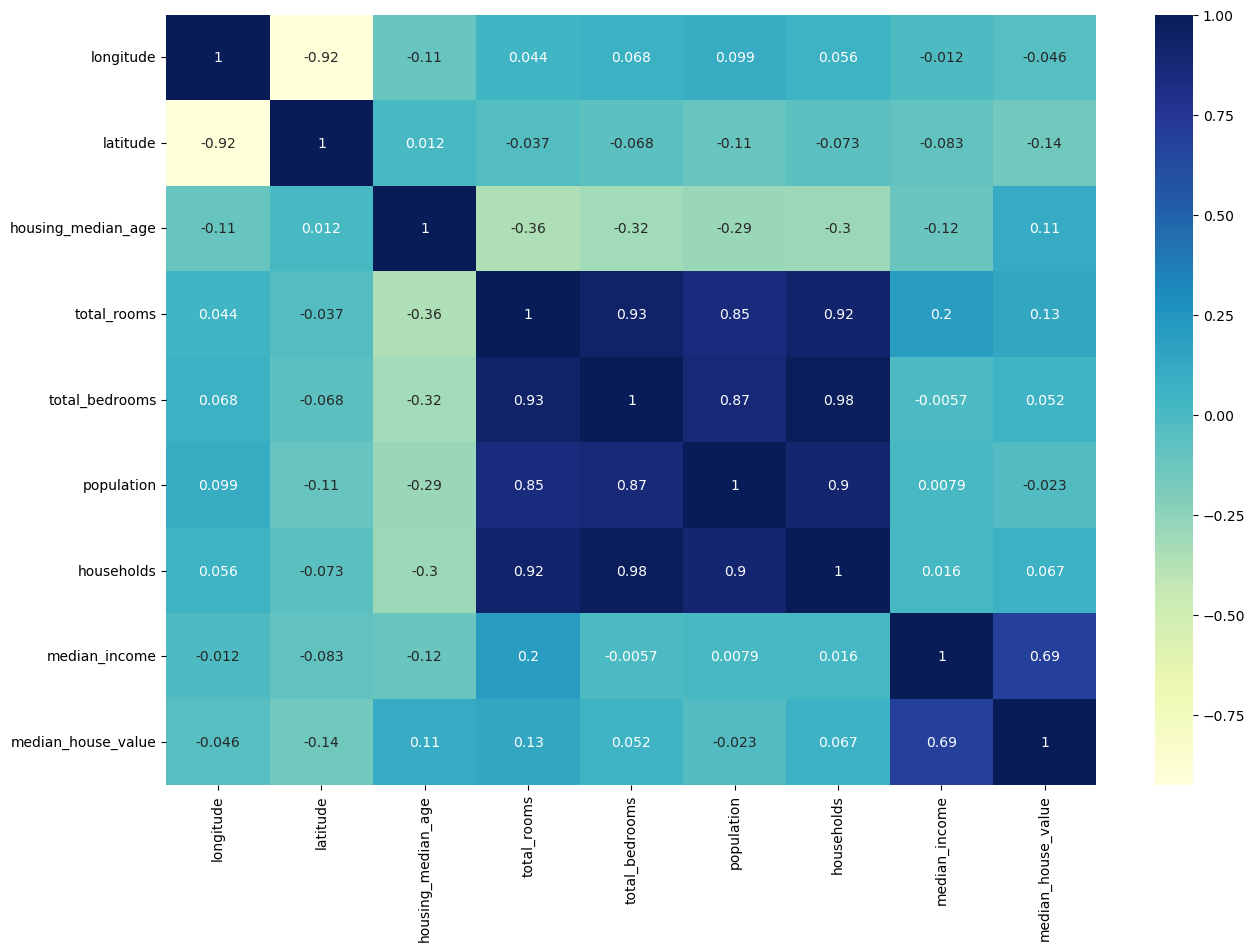

In [19]:
# Making heatmap to
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [20]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

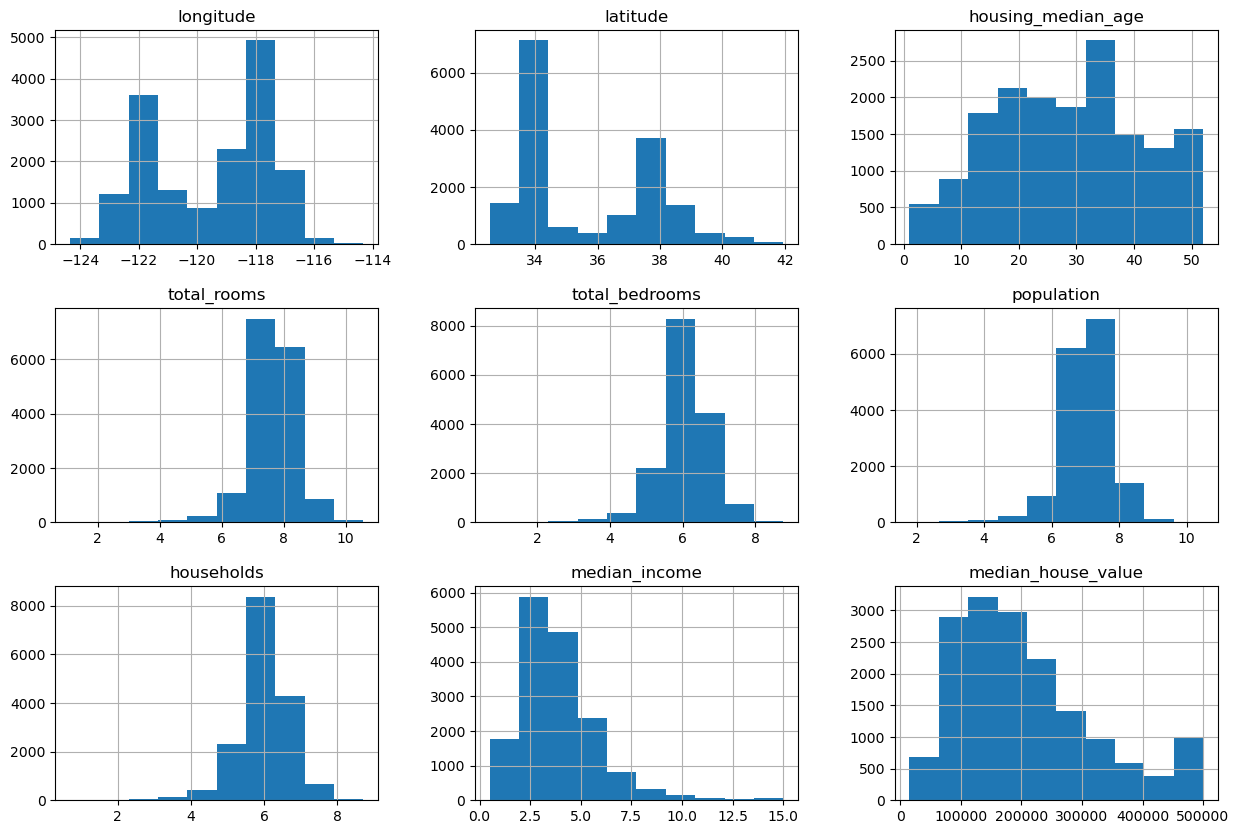

In [21]:
train_data.hist(figsize=(15,10))

In [22]:
train_data['ocean_proximity'] = x['ocean_proximity']
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15610,-116.87,32.72,13.0,8.092239,6.198479,7.266827,6.222576,5.7652,259900.0,<1H OCEAN
12478,-121.48,38.59,52.0,7.079184,5.834811,6.946014,5.771441,1.6116,70500.0,INLAND
5996,-117.73,34.09,36.0,7.342132,5.697093,7.212294,5.717028,3.5313,117800.0,INLAND
11827,-121.02,39.01,17.0,8.473659,6.684612,7.633854,6.647688,3.9734,185400.0,INLAND
5183,-118.26,33.94,41.0,7.320527,6.018593,7.250636,5.966147,1.6500,94200.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
13246,-117.63,34.12,4.0,8.371936,6.654153,7.299797,6.498282,6.0758,226800.0,INLAND
19844,-119.09,36.42,17.0,6.777647,5.393628,6.874198,5.389072,2.0000,52500.0,INLAND
9944,-122.26,38.16,23.0,7.951911,6.198479,7.369601,6.146329,4.0337,130400.0,NEAR BAY
10908,-117.86,33.74,9.0,6.265301,5.147494,7.137278,5.111988,3.3750,165300.0,<1H OCEAN


In [23]:
# Explicit data type
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

<Axes: >

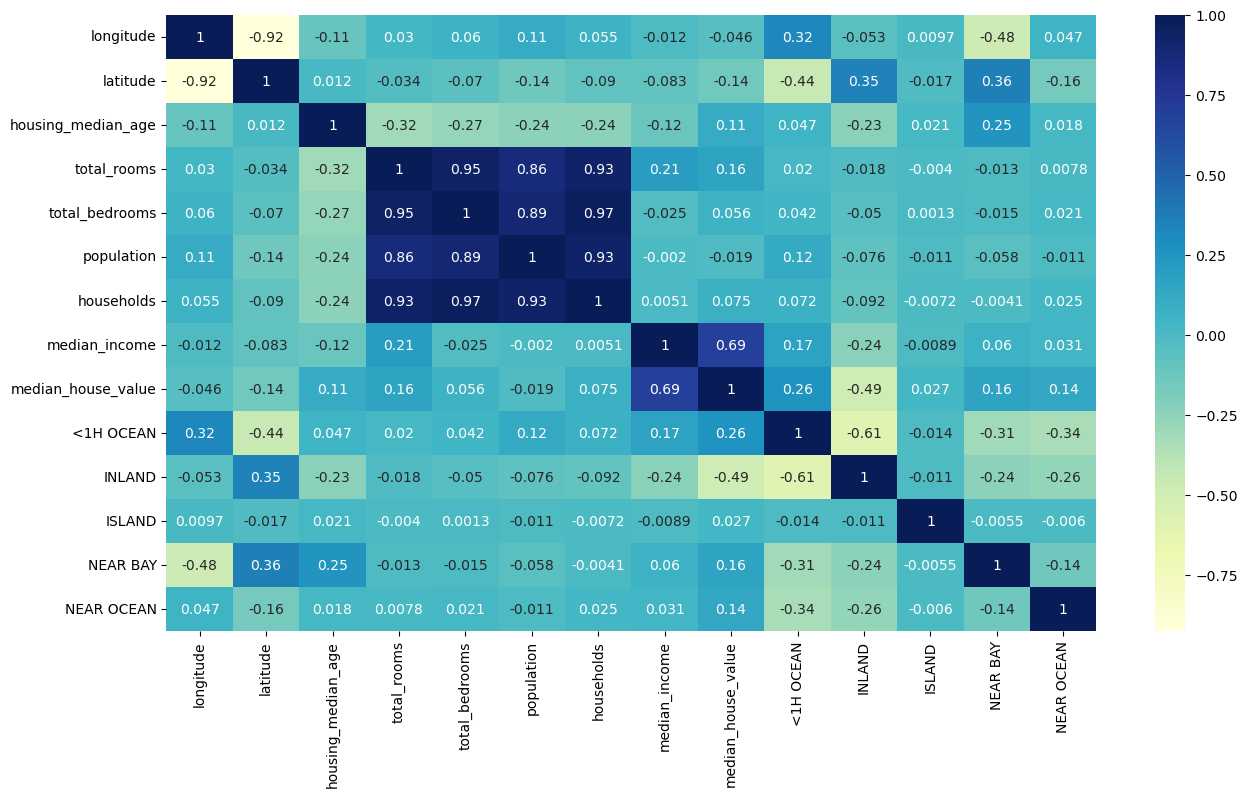

In [24]:
# Plotting Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

### Feature Engineering

<Axes: xlabel='latitude', ylabel='longitude'>

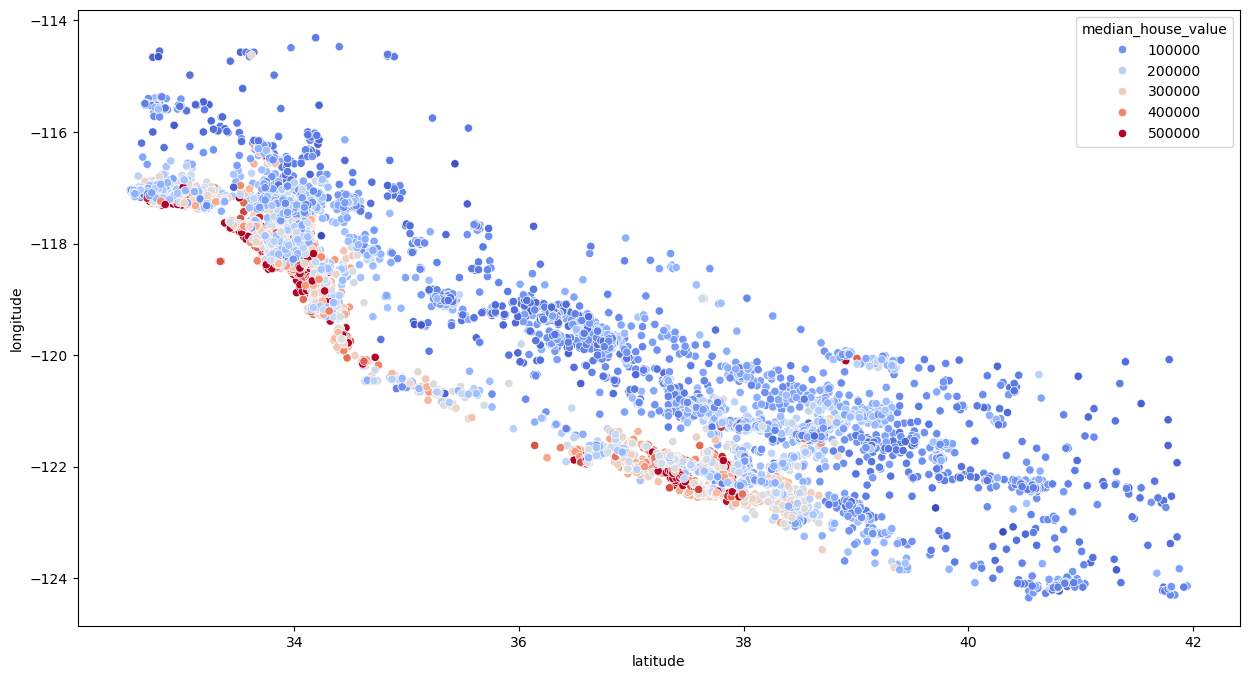

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", hue="median_house_value", data=train_data, palette="coolwarm")

In [26]:
# Find relation of bedroom per house and household per room
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['households'] / train_data['total_rooms']

<Axes: >

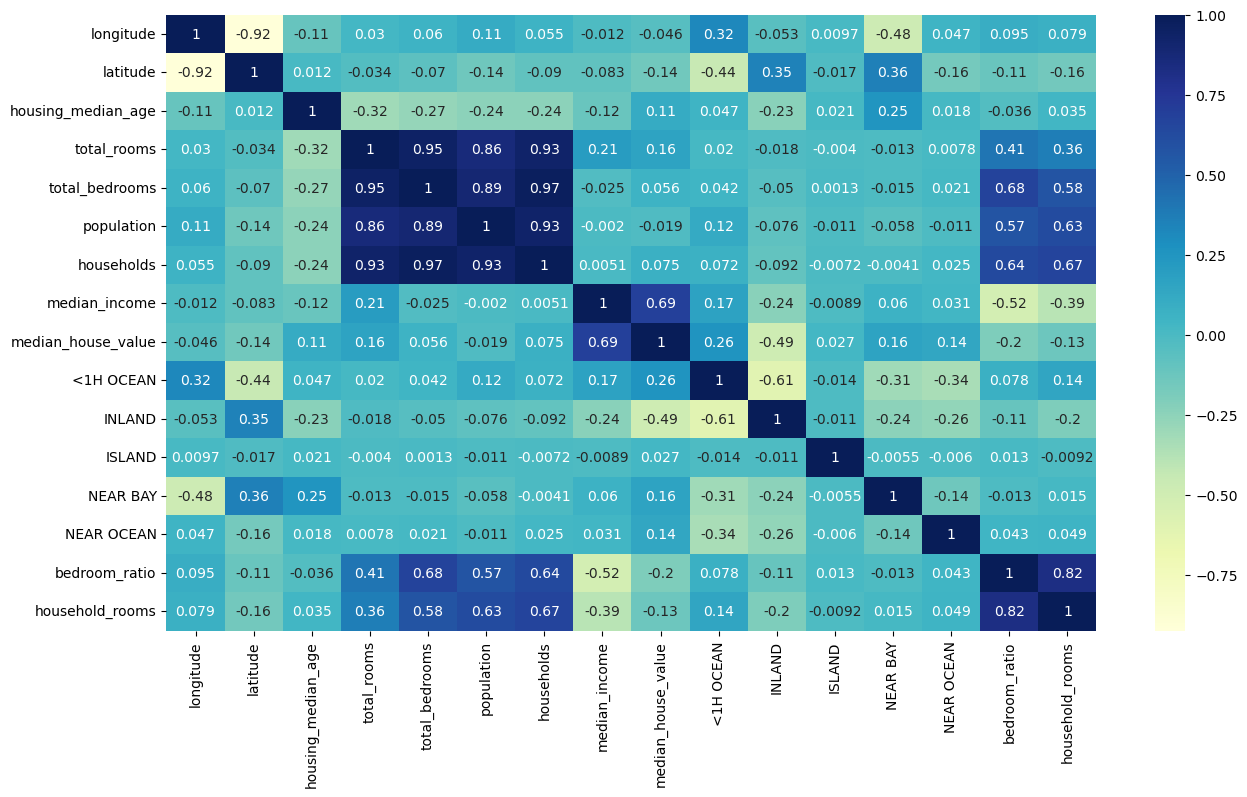

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

### Making Simple Regression Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']
x_train_s = sc.fit_transform(x_train)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
# Join test data to make co-relations
test_data = x_test.join(y_test)
test_data = test_data.drop(['ocean_proximity'], axis=1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['ocean_proximity'] = x['ocean_proximity']

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

# Find relation of bedroom per house and household per room
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['households'] / test_data['total_rooms']

In [30]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14185,-117.08,32.70,37.0,7.685703,6.037871,7.171657,5.929589,2.8750,98900.0,0,0,0,0,1,0.785598,0.771509
6125,-117.91,34.11,20.0,8.058011,6.529419,7.781973,6.570883,3.5250,153000.0,1,0,0,0,0,0.810302,0.815447
14095,-117.10,32.75,11.0,7.780721,6.588926,7.552762,6.568078,1.3448,91300.0,0,0,0,0,1,0.846827,0.844148
14359,-117.22,32.74,52.0,7.139660,5.313206,6.320768,5.347108,7.2758,345200.0,0,0,0,0,1,0.744182,0.748930
18004,-121.99,37.29,32.0,7.983099,6.177944,7.198184,6.177944,6.4631,344100.0,1,0,0,0,0,0.773878,0.773878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19533,-120.91,37.66,36.0,7.186144,5.545177,6.580639,5.451038,2.6523,76300.0,0,1,0,0,0,0.771648,0.758548
7695,-118.11,33.96,29.0,7.932003,6.368187,7.153834,6.311735,4.3882,261600.0,1,0,0,0,0,0.802847,0.795730
15558,-117.07,33.12,12.0,7.805475,6.396930,7.132498,6.272877,2.4122,127000.0,1,0,0,0,0,0.819544,0.803651
16731,-120.49,35.35,17.0,8.020928,6.411818,7.284821,6.302619,3.1641,158600.0,1,0,0,0,0,0.799386,0.785772


In [31]:
x_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

In [32]:
x_test_s = sc.transform(x_test)

In [33]:
# Checking model fit
regressor.score(x_test, y_test)

0.6778797770793599

### Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [36]:
forest.score(x_test_s, y_test)

0.8149271839806397